# Sheet 1

__Question 1__

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def rx():
    u = random.random()
    return (1-u)*u

$ X \sim U[0,1] \qquad Y = X(1-X)$

Details on written notes

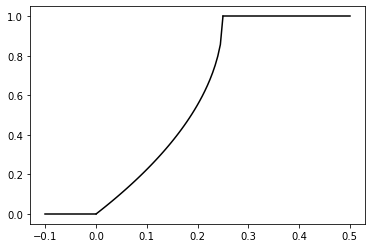

In [11]:
rng2 = np.linspace(0,.25, 50)
rng3 = np.linspace(.25, .5, 20)
rng1 = np.linspace(-.1, 0,20 )

fig, ax = plt.subplots()
ax.plot(rng1, [0]*20, c='black')
ax.plot(rng2,1 - np.sqrt(1-4*rng2), c='black')
ax.plot(rng3, [1]*20, c= 'black')

plt.show()

__Exercise-2__

__Question 3__

In [2]:
import scipy.optimize, scipy.stats

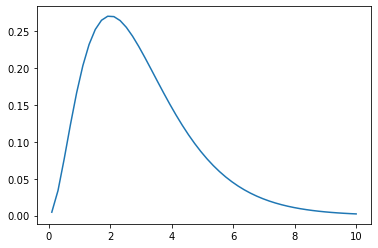

In [24]:
def f(k, λ):
    return scipy.stats.poisson.pmf(k,λ)
#np.power(λ, k)*np.exp(-λ)

x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, f(2, x))
plt.show()

In [29]:
def loglik(x, μ):
    lik = scipy.stats.poisson.pmf(x, μ)
    return np.log(lik)

data = [3,2,8,1,5,0,8]
(μhat,) = scipy.optimize.fmin(lambda μ: -np.sum(loglik(x=data, μ=μ)), x0=2)
μhat
    

Optimization terminated successfully.
         Current function value: 19.033583
         Iterations: 17
         Function evaluations: 34


3.857128906250004

__Question 7__

We use hot-one coding

In [143]:
import sklearn.linear_model
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
iris = pd.read_csv('iris.csv')

In [145]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [146]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [147]:
iris['Sepal.Length'] = pd.concat([iris.loc[iris.Species=='setosa', 'Sepal.Length'],
                                 iris.loc[iris.Species!='setosa', 'Sepal.Length'].apply(lambda x: x + 2)])

In [148]:
iris.loc[iris.Species!='setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,9.0,3.2,4.7,1.4,versicolor
51,8.4,3.2,4.5,1.5,versicolor
52,8.9,3.1,4.9,1.5,versicolor
53,7.5,2.3,4.0,1.3,versicolor
54,8.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,8.7,3.0,5.2,2.3,virginica
146,8.3,2.5,5.0,1.9,virginica
147,8.5,3.0,5.2,2.0,virginica
148,8.2,3.4,5.4,2.3,virginica


In [149]:
PL, SL = iris['Petal.Length'], iris['Sepal.Length']

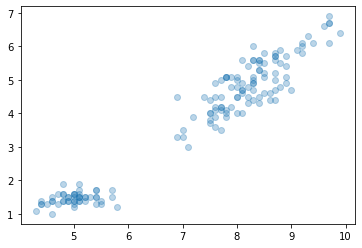

In [150]:
fig, ax = plt.subplots()
ax.scatter(SL, PL, alpha=.3)
plt.show()

In [151]:
inflection_x = 6
one_hot = [SL<=inflection_x, SL > inflection_x]  # creates vectors of 1's and 0's (False and True's)
X = np.column_stack([s*SL for s in one_hot])
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, PL)
new_x = np.linspace(4, 9, 50)
new_onehot = [new_x<=inflection_x, new_x>inflection_x]
new_X = np.column_stack([s*new_x for s in new_onehot])
predy = model.predict(new_X)

model.intercept_, model.coef_

(0.0, array([0.29127386, 0.59657678]))

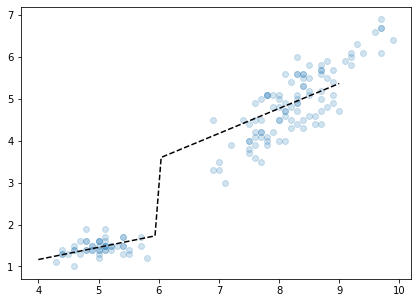

In [152]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.scatter(SL, PL, alpha=.2)
ax.plot(new_x,predy, c='black', linestyle='dashed')
plt.show()

__Question 8__

In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

In [121]:
climate = pd.read_csv('climate.csv')


In [122]:
climate = climate.loc[climate.station == 'Cambridge']

In [123]:
t = climate.yyyy + (climate.mm - 1)/12
temp = .5*(climate.tmin + climate.tmax)

$$ \text{temp} \approx \alpha + \beta_1\sin(2\pi t) + \beta_2\cos(2\pi t) + \gamma_u t \qquad u \in \text{decades}$$

In [124]:
num_decades = (np.floor(t.max()) - np.floor(t.min())) // 10 # how many decades?
num_decades

6.0

In [125]:
bins = pd.cut(t, 6, include_lowest=True).unique()
climate['bins'] = pd.cut(t, 6, include_lowest=True)
climate.head()

,yyyy,mm,tmax,tmin,af,rain,sun,status,station,lat,lng,height,bins
6274,1959.0,1.0,4.4,-1.4,20,---,78.1,NaN,Cambridge,52.245,0.102,26,"(1958.9370000000001, 1969.264]"
6275,1959.0,2.0,7.5,1.2,9,---,66.0,NaN,Cambridge,52.245,0.102,26,"(1958.9370000000001, 1969.264]"
6276,1959.0,3.0,11.5,3.8,0,---,98.0,NaN,Cambridge,52.245,0.102,26,"(1958.9370000000001, 1969.264]"
6277,1959.0,4.0,14.3,5.4,0,---,146.1,NaN,Cambridge,52.245,0.102,26,"(1958.9370000000001, 1969.264]"
6278,1959.0,5.0,18.1,6.5,0,---,224.8,NaN,Cambridge,52.245,0.102,26,"(1958.9370000000001, 1969.264]"


In [130]:
one_hot = [t.apply(lambda x: x in bins[k]) for k in range(0, len(bins))]

In [131]:
π = np.pi
X = np.column_stack([np.sin(2*π*t), np.cos(2*π*t)] + [s*t for s in one_hot])

model = sklearn.linear_model.LinearRegression()
model.fit(X, temp)
model.intercept_, model.coef_

(12.876484308883732,
 array([-1.07575853e+00, -6.55698814e+00, -1.62662771e-03, -1.55577505e-03,
        -1.53118842e-03, -1.20285932e-03, -1.00455859e-03, -9.85338469e-04]))

In [132]:
new_t = np.linspace(np.floor(t.min()), np.ceil(t.max()), 12*int(t.max() - t.min()))
new_onehot = [(bins[k].left < new_t) * (new_t <= bins[k].right) for k in range(0, len(bins))]
new_X = np.column_stack([np.sin(2*π*new_t), np.cos(2*π*new_t)] + [s*new_t for s in new_onehot])
pred_temp = model.predict(new_X)

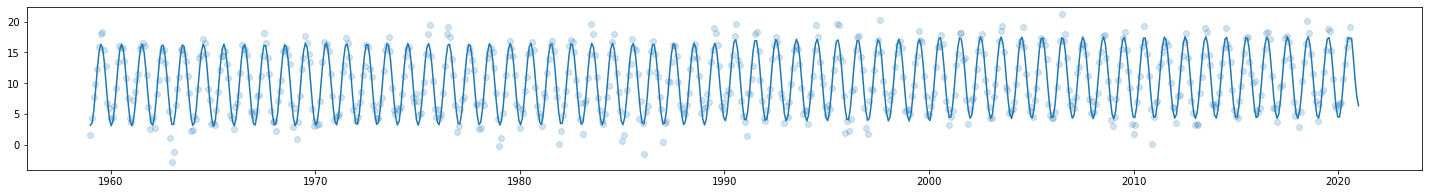

In [133]:
fig, ax = plt.subplots(figsize=(25,3))
ax.scatter(t, temp, alpha=.2)
ax.plot(new_t, pred_temp)
plt.show()

$$ \text{temp} \approx \alpha + \beta_1\sin(2\pi t) + \beta_2\cos(2\pi t) + \gamma_u \qquad u \in \text{decades} \qquad \gamma_u \equiv \text{constant}$$

Now instead, since the last terms $\gamma_u$ are constant, including alpha gives a set of linearly dependent vectors. We choose therefore to exclude the constant for the first decade.

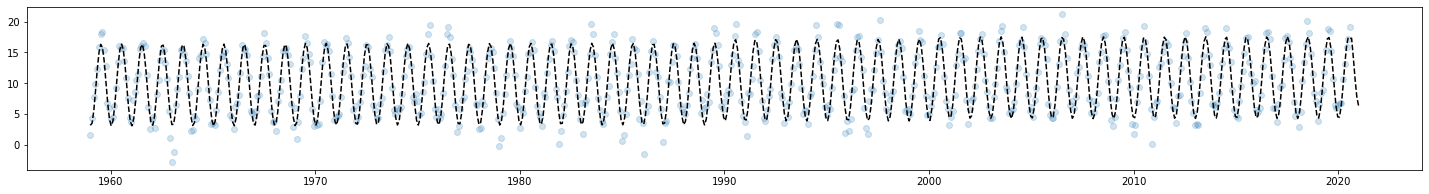

In [138]:
one_hot = [t.apply(lambda x: x in bins[k]) for k in range(0, len(bins))]
π = np.pi
X = np.column_stack([np.sin(2*π*t), np.cos(2*π*t)] + [s for s in one_hot])

model = sklearn.linear_model.LinearRegression()
model.fit(X, temp)

new_t = np.linspace(np.floor(t.min()), np.ceil(t.max()), 12*int(t.max() - t.min()))
new_onehot = [(bins[k].left < new_t) * (new_t <= bins[k].right) for k in range(0, len(bins))]
new_X = np.column_stack([np.sin(2*π*new_t), np.cos(2*π*new_t)] + [s for s in new_onehot])
pred_temp = model.predict(new_X)

fig, ax = plt.subplots(figsize=(25, 3))
ax.scatter(t, temp, alpha=.2)
ax.plot(new_t, pred_temp, c='black', linestyle='dashed')
plt.show()


<em>ToDo: residual plot</em>

__Question 10__

In [139]:
police = pd.read_csv('stop-and-search.csv')

In [149]:
# Only keep rows where ethnicity is valid, and outcome isn't blank.
ethnicity_levels = ['Asian','Black','Mixed','Other','White']
ok = police['officer_defined_ethnicity'].isin(ethnicity_levels) & (police['outcome']!='') & police.gender.notna()
eth = police.loc[ok, 'officer_defined_ethnicity']
gen = police.loc[ok, 'gender']
y = np.where(police.loc[ok, 'outcome']=='False', 0, 1)

In [148]:
gender_levels = police.gender.dropna().unique()

In [151]:
some_levels = [k for k in ethnicity_levels if k!= 'Asian']
some_levels

['Black', 'Mixed', 'Other', 'White']

In [150]:
gen_one_hot = [np.where(gen==k, 1, 0) for k in gender_levels]
eth_one_hot = [np.where(eth==k, 1, 0) for k in ethnicity_levels]

In [177]:
# non-identifiable features
X = np.column_stack(gen_one_hot + eth_one_hot)
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, y)

coeff = model.coef_
for i in range(len(gender_levels)):
    print(f'α[{gender_levels[i]}] = {coeff[i]}')
for j in range(3, len(ethnicity_levels) + len(gender_levels)):
    print(f'β[{ethnicity_levels[j-len(gender_levels)]}] = {coeff[j]}')

α[Male] = 375462996.7310354
α[Female] = 375462996.72292435
α[Other] = 375462996.61684597
β[Asian] = -375462995.9479315
β[Black] = -375462995.9658953
β[Mixed] = -375462995.81149125
β[Other] = -375462995.96096784
β[White] = -375462995.96961546


In [179]:
np.linalg.matrix_rank(X)

7

So the maximal linearly independent subset has dimension 7 --> we only neeed to remove one feature. As in the lecture notes we choose to remove eth == 'Asian'.